# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [2]:
from __future__ import print_function, division
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
# Your code goes here
print('Number of instances: {}, number of attributes: {}'.format(X.shape[0], X.shape[1]))
print(X.head(10))
print(X.describe())
print(y)
print(len(y))

Number of instances: 2845, number of attributes: 1000
   abc   ability  able   ac  accept  access  according  acquired  actually  \
0  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
1  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
2  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
3  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
4  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
5  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
6  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
7  0.0  0.000000   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   
8  0.0  0.000000   0.0  0.0     0.0     0.0   0.133553       0.0       0.0   
9  0.0  0.420916   0.0  0.0     0.0     0.0   0.000000       0.0       0.0   

   adaptec  ...   written  wrong  yankees  yeah  year  years  yes  york  \
0      0.0  

*Your answer goes here*

The instances represent different documents and the attributes represent the importance of the word attribute in the document with respect to a corpus. Y is the vector of categories of the 5 newsgroups of the documents in the X dataframe.

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
# Your code goes here
kmeans = KMeans(n_clusters=5, random_state=1337)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1337, tol=0.0001,
    verbose=0)

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
# Your code goes here
mean = X.describe().iloc[1,:].values
mean_point = X.describe().iloc[1,:].values
avg_distance = np.mean(euclidean_distances(X,[mean]))
print("Avg distance from mean: " + str(avg_distance))
print("Inertia: " + str(kmeans.inertia_))
print("Adjusted rand index: " + str(adjusted_rand_score(y,kmeans.labels_)))

Avg distance from mean: 0.954581397358
Inertia: 2593.17430766
Adjusted rand index: 0.216104350793


*Your answer goes here*

The adjusted random index is a measure of how similar 2 clusterings are. It takes into account if pairs of points in one clustering method are in the same cluster or not and checks if this is the case for the second clustering method, i.e. it is the measure of accuracy between 2 clusters.

Inertia is the sum of squared distances from each point to it's closest cluster center.

The value for ARI is not very good. The clustering shows some similarity because ARI is positive, but ARI could be much closer to 1.

### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [7]:
# Your code goes here
xcounts = np.unique(y,return_counts = True)
print(xcounts)
print("Classes - Atheism 480, pc.hardware - 590, mac.hardware = 578, sport.baseball = 597, sport.hockey = 600")
print(np.unique(kmeans.labels_, return_counts=True))
print("Data points in clusters - 1050, 570, 649, 233, 343")

(array(['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'rec.sport.baseball', 'rec.sport.hockey'], 
      dtype='|S24'), array([480, 590, 578, 597, 600]))
Classes - Atheism 480, pc.hardware - 590, mac.hardware = 578, sport.baseball = 597, sport.hockey = 600
(array([0, 1, 2, 3, 4], dtype=int32), array([1050,  570,  649,  233,  343]))
Data points in clusters - 1050, 570, 649, 233, 343


*Your answer goes here*

The number of points in the clusters look a lot different than the classes distribution. It is likely that some of the assumptions kmeans make are broken, e.g. the data is not spherical or the variances of the different attributes vary a lot. 

### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
# Your code goes here
print(euclidean_distances(kmeans.cluster_centers_,kmeans.cluster_centers_))

[[ 0.          0.19481871  0.20336322  0.33095496  0.22738455]
 [ 0.19481871  0.          0.29223799  0.32040898  0.29210539]
 [ 0.20336322  0.29223799  0.          0.39748207  0.28369637]
 [ 0.33095496  0.32040898  0.39748207  0.          0.39922129]
 [ 0.22738455  0.29210539  0.28369637  0.39922129  0.        ]]


### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

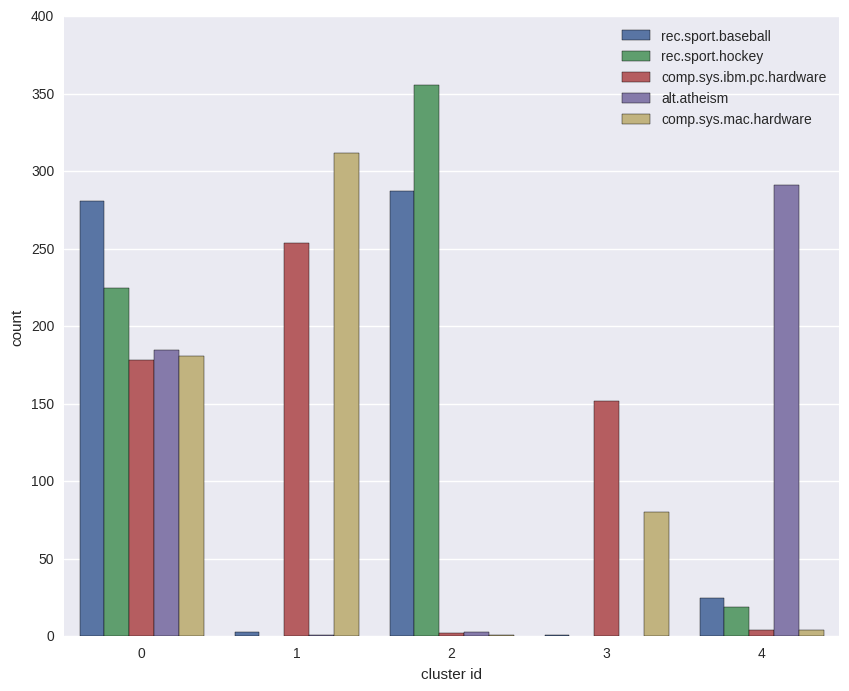

In [10]:
# Your code goes here
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')

*Your answers goes here*

The fit is not very good, as remarked in the answer about class distributions above. The only clear clustering is that of atheism, where the probability of a point in the 4-th cluster being atheism is the highest. Cluster 0 is the most unclear.

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [11]:
# Your code goes here
n_components = [1,2,3,5,10,20,50,100,500,1000] 
rand_component = {}


for n in n_components:
    pca = PCA(n_components=n)
    X_d = pca.fit_transform(X)
    kmeans_d = KMeans(n_clusters=5).fit(X_d)
    print("Inertia and rand index for " + str(n) + " principal components:")
    print("Inertia: " + str(kmeans_d.inertia_))
    print("Adjusted rand: " + str(adjusted_rand_score(y,kmeans_d.labels_)))
    print ("---")
    rand_component[n] = adjusted_rand_score(y,kmeans_d.labels_)
    
    

Inertia and rand index for 1 principal components:
Inertia: 2.82168216176
Adjusted rand: 0.209736718231
---
Inertia and rand index for 2 principal components:
Inertia: 10.592280453
Adjusted rand: 0.268079336483
---
Inertia and rand index for 3 principal components:
Inertia: 20.4233010148
Adjusted rand: 0.238732152267
---
Inertia and rand index for 5 principal components:
Inertia: 49.8677391733
Adjusted rand: 0.2288985833
---
Inertia and rand index for 10 principal components:
Inertia: 118.179284757
Adjusted rand: 0.216587702464
---
Inertia and rand index for 20 principal components:
Inertia: 231.908462084
Adjusted rand: 0.211932213293
---
Inertia and rand index for 50 principal components:
Inertia: 492.338899926
Adjusted rand: 0.215989028456
---
Inertia and rand index for 100 principal components:
Inertia: 820.185399352
Adjusted rand: 0.207346888796
---
Inertia and rand index for 500 principal components:
Inertia: 2143.89143726
Adjusted rand: 0.211477102216
---
Inertia and rand index f

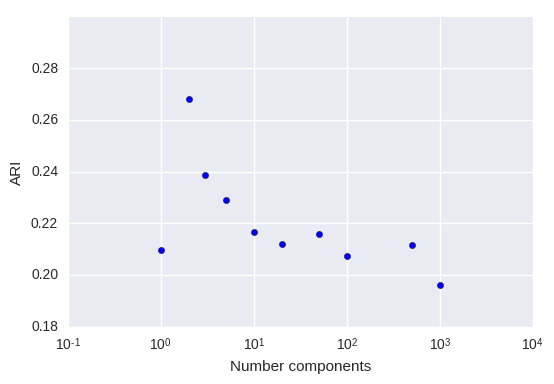

In [12]:
ax = plt.subplot(111)
ax.set_xscale('log')
plt.xlabel('Number components')
plt.ylabel('ARI')
ax.scatter(rand_component.keys(), rand_component.values())

*Your answer goes here*

"look again"
1. The graph describes the relationship between the number of dimensions used with the greatest variance and the ARI score between the real y labeling and the clustering procedure.

2. We can't use inertia to choose the best number of components because we can't compare the distances between different number of dimensions. Higher dimensions are bound to have bigger inertia because the points are inhabiting a larger space. The only way to add one dimension and keep the distance the same is if the points all lie on the lower dimensional hyperplane. Nevertheless, adding one dimension more may improve clustering because after adding this dimension the data may seem to adhere to the clustering assumptions more closely, e.g. it may appear more spherical or more easily discriminated. An example of this is the difference is using 100 and 500 principal components. The inertia is higher for 500 but the ARI is also higher for 500.

3. PCA could help by reducing noise - some dimensions shouldn't have signals, but due to noise they may interfere with the structure of the data. Also, k-means uses Euclidean distance as a distance metric, but this may not be the instrinsic metric of the data in higher dimensions. PCA may help k-means by reducing the space such that the instrinsic metric of the data gets similar to the Euclidian distance metric.


### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

(array([0, 1, 2, 3, 4], dtype=int32), array([296, 752, 620, 211, 966]))


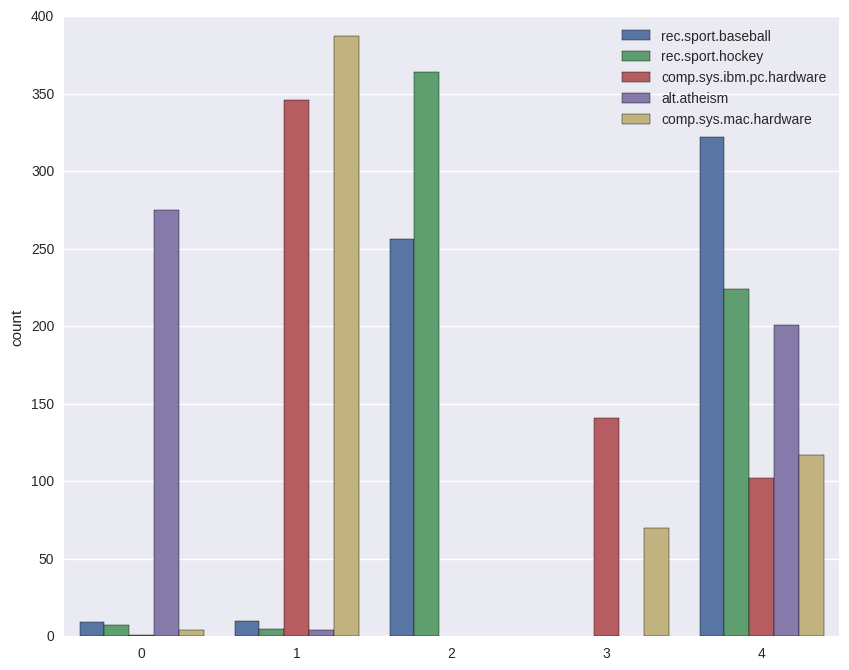

In [13]:
# Your code goes here
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
kmeans_pca = KMeans(n_clusters=5, random_state=1337).fit(X_2d)
fig_2, ax_2 = plt.subplots(figsize=(10,8))
sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax_2)
print(np.unique(kmeans_pca.labels_, return_counts=True))

*Your answer goes here*

Eyeing the plot, I can't really say that the distribution is a lot better, but the ARI score is higher. Cluster 3 doesn't have so much classes, so the probability of a point in this cluster being blue is higher which is good. The red and the yellow points from this cluster have transfered to the 0-th and the 4-th cluter. Cluster 0 has become a little bit more unclear, which is bad. Overall, using 2 dimensions is slightly better than using 1000. 

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

(array(['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'rec.sport.baseball', 'rec.sport.hockey'], 
      dtype='|S24'), array([296, 211, 752, 966, 620]))


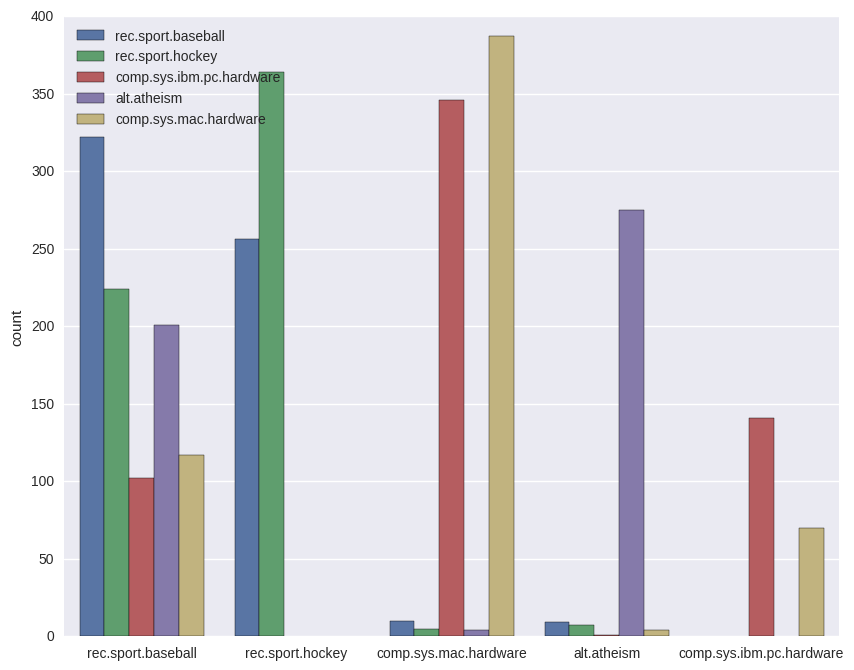

In [14]:
# Your code goes here

labelsdict = {3:'comp.sys.ibm.pc.hardware', 1:'comp.sys.mac.hardware', 2:'rec.sport.hockey',
             4:'rec.sport.baseball', 0:'alt.atheism'}

# alt.atheism
# comp.sys.ibm.pc.hardware
# comp.sys.mac.hardware
# rec.sport.baseball
# rec.sport.hockey

labels_interp = []

for label in kmeans_pca.labels_:
    labels_interp.append(labelsdict[label])
    
fig_3, ax_3 = plt.subplots(figsize=(10,8))
sns.countplot(x=labels_interp, hue=y, ax=ax_3)
print(np.unique(labels_interp, return_counts=True))

### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

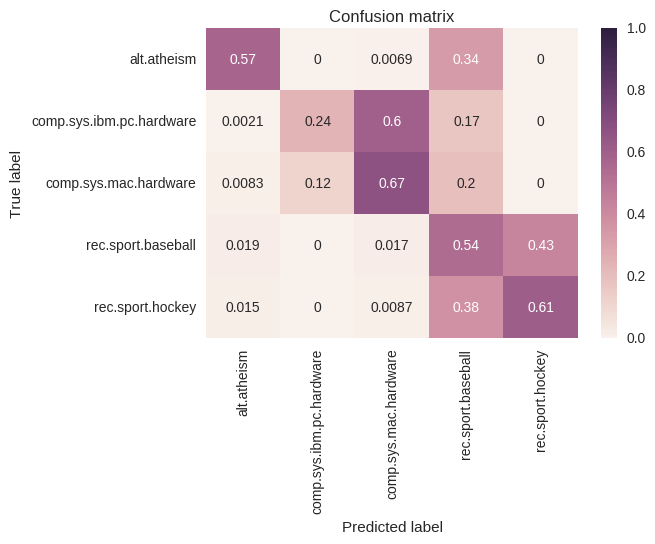

In [15]:
# Your code goes here
from sklearn.metrics import confusion_matrix

# alt.atheism
# comp.sys.ibm.pc.hardware
# comp.sys.mac.hardware
# rec.sport.baseball
# rec.sport.hockey


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

conf_m = confusion_matrix(y, labels_interp)
conf_m = conf_m/conf_m.astype(np.float).sum(axis = 1)

plot_confusion_matrix(conf_m, classes = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']) # 




In [16]:
y_true = pd.Series(y)
y_pred = pd.Series(labels_interp)
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted                 alt.atheism  comp.sys.ibm.pc.hardware  \
True                                                              
alt.atheism                       275                         0   
comp.sys.ibm.pc.hardware            1                       141   
comp.sys.mac.hardware               4                        70   
rec.sport.baseball                  9                         0   
rec.sport.hockey                    7                         0   
All                               296                       211   

Predicted                 comp.sys.mac.hardware  rec.sport.baseball  \
True                                                                  
alt.atheism                                   4                 201   
comp.sys.ibm.pc.hardware                    346                 102   
comp.sys.mac.hardware                       387                 117   
rec.sport.baseball                           10                 322   
rec.sport.hockey                              5                 224   
All                                         752                 966   

Predicted                 rec.sport.hockey   All  
True                                              
alt.atheism                              0   480  
comp.sys.ibm.pc.hardware                 0   590  
comp.sys.mac.hardware                    0   578  
rec.sport.baseball                     256   597  
rec.sport.hockey                       364   600  
All                                    620  2845

In [17]:
conf_m

array([[ 0.57291667,  0.        ,  0.00692042,  0.33668342,  0.        ],
       [ 0.00208333,  0.23898305,  0.59861592,  0.17085427,  0.        ],
       [ 0.00833333,  0.11864407,  0.66955017,  0.1959799 ,  0.        ],
       [ 0.01875   ,  0.        ,  0.01730104,  0.53936348,  0.42666667],
       [ 0.01458333,  0.        ,  0.00865052,  0.37520938,  0.60666667]])

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

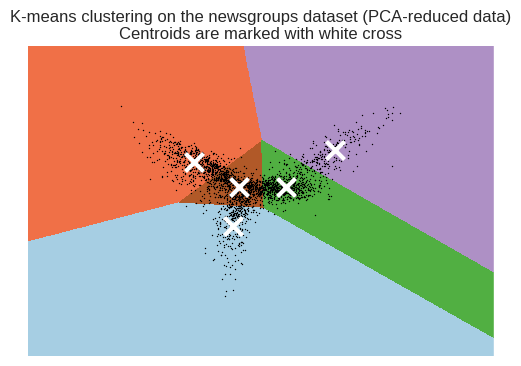

In [19]:
# Your code goes here

reduced_data = X_2d

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.25, reduced_data[:, 0].max() + 0.25
y_min, y_max = reduced_data[:, 1].min() - 0.25, reduced_data[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the newsgroups dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()




/home/deyan/virtualenvs/iaml_env/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/deyan/virtualenvs/iaml_env/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/deyan/virtualenvs/iaml_env/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature 

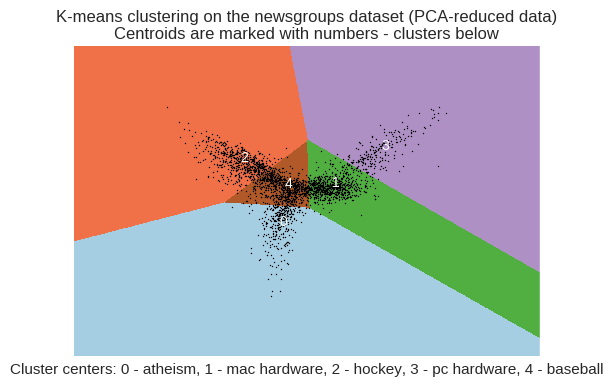

In [23]:
# Your code goes here

reduced_data = X_2d

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.25, reduced_data[:, 0].max() + 0.25
y_min, y_max = reduced_data[:, 1].min() - 0.25, reduced_data[:, 1].max() + 0.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
for centroid in centroids:
    plt.annotate(str(kmeans_pca.predict(centroid))[1:len(str(kmeans_pca.predict(centroid)))-1], (centroid[0],centroid[1]), color = 'w')
plt.title('K-means clustering on the newsgroups dataset (PCA-reduced data)\n'
          'Centroids are marked with numbers - clusters below')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Cluster centers: 0 - atheism, 1 - mac hardware, 2 - hockey, 3 - pc hardware, 4 - baseball')
plt.xticks(())
plt.yticks(())
plt.show()




explained variance ratio (first two components): [ 0.01428699  0.00904075]


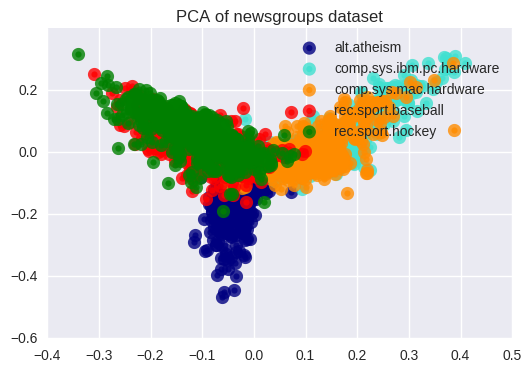

In [24]:

target_names = newsgroups_train.target_names
y_tar = newsgroups_train.target

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca_2d.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange','red','green']
lw = 5

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_2d[y_tar == i, 0], X_2d[y_tar == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of newsgroups dataset')


### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*

1. No, because k-means initially chooses k clusters at random and depending on the selection it could yield different results. Different methods of choosing the centers may make kmeans deterministic.
2. I'm not sure what is meant by "multiple initialisations". The algorithm in q 1.2 uses kmeans++ and we have set random state so for a set of points the chosen centers will always be the same when fitting the same set.
3. Another method would be choosing the kmeans centers at random as in the standart algorithm which can lead to poor clusterings. kmeans++ has been shown to generally be faster and to have better performance.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [119]:
digits.data.shape

(1797, 64)

In [132]:
# Your code goes here
np.set_printoptions(threshold=np.nan)
print("Plots in cells below.")
print("Minimum values:")
print(np.min(digits['data'], axis = 0))
print("---")
print("Maximum values:")
print(np.max(digits['data'], axis = 0))
print("---")

df = pd.DataFrame(digits['data'])
df['classes'] = digits['target']



Plots in cells below.
Minimum values:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
---
Maximum values:
[  0.   8.  16.  16.  16.  16.  16.  15.   2.  16.  16.  16.  16.  16.  16.
  12.   2.  16.  16.  16.  16.  16.  16.   8.   1.  15.  16.  16.  16.  16.
  15.   1.   0.  14.  16.  16.  16.  16.  14.   0.   4.  16.  16.  16.  16.
  16.  16.   6.   8.  16.  16.  16.  16.  16.  16.  13.   1.   9.  16.  16.
  16.  16.  16.  16.]
---


Heatmap variances among the dimension of all images:


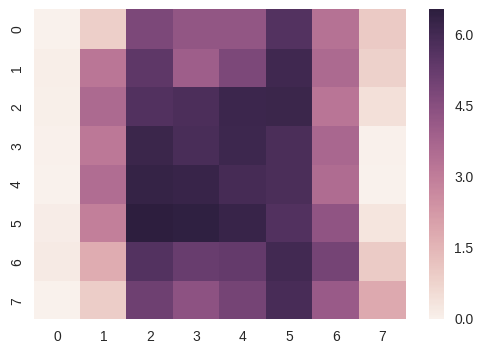

In [133]:
heatch = df.describe().loc['std'].values[0:-1]
heatch_resh = heatch.reshape(8,8)
print("Heatmap variances among the dimension of all images:")
sns.heatmap(heatch_resh)


Plotting first 10 images:


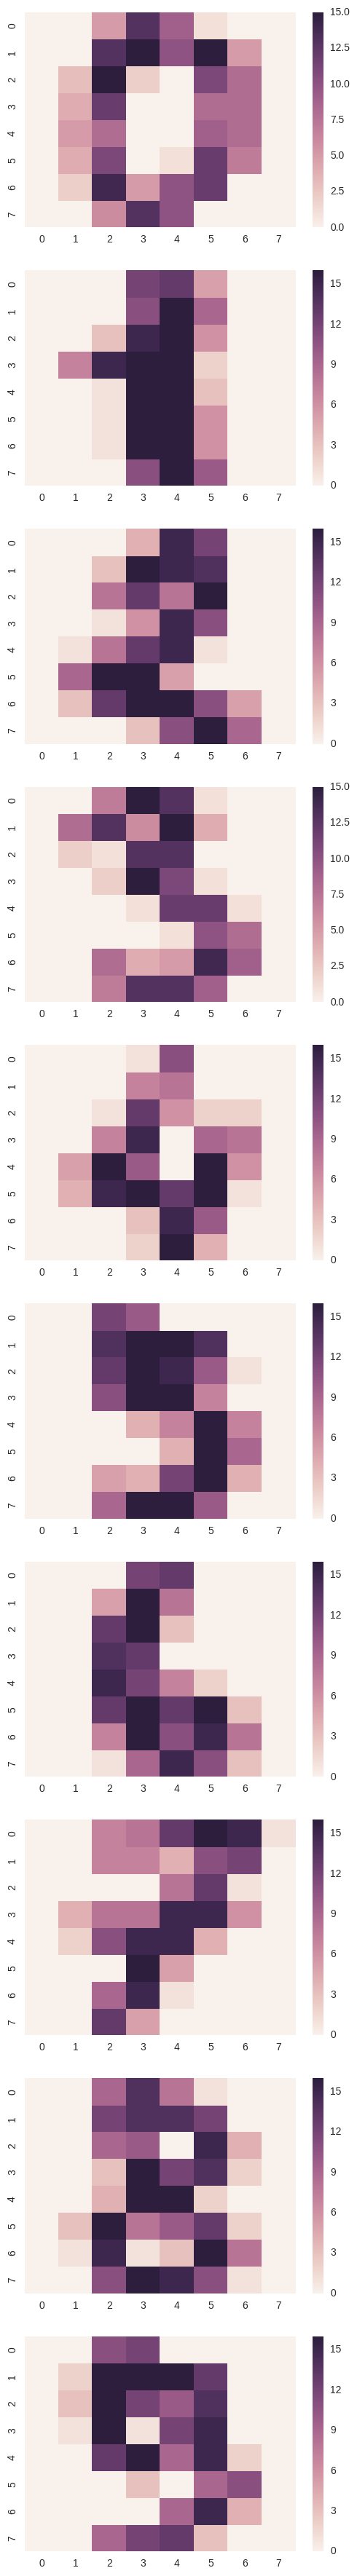

In [136]:
huge_figure = plt.figure(figsize=(6,45))

print("Plotting first 10 images:")
for im in range(0,10):
    huge_figure.add_subplot(10,1,im+1)
    sns.heatmap(digits['images'][im])

Variances among the different image classes:


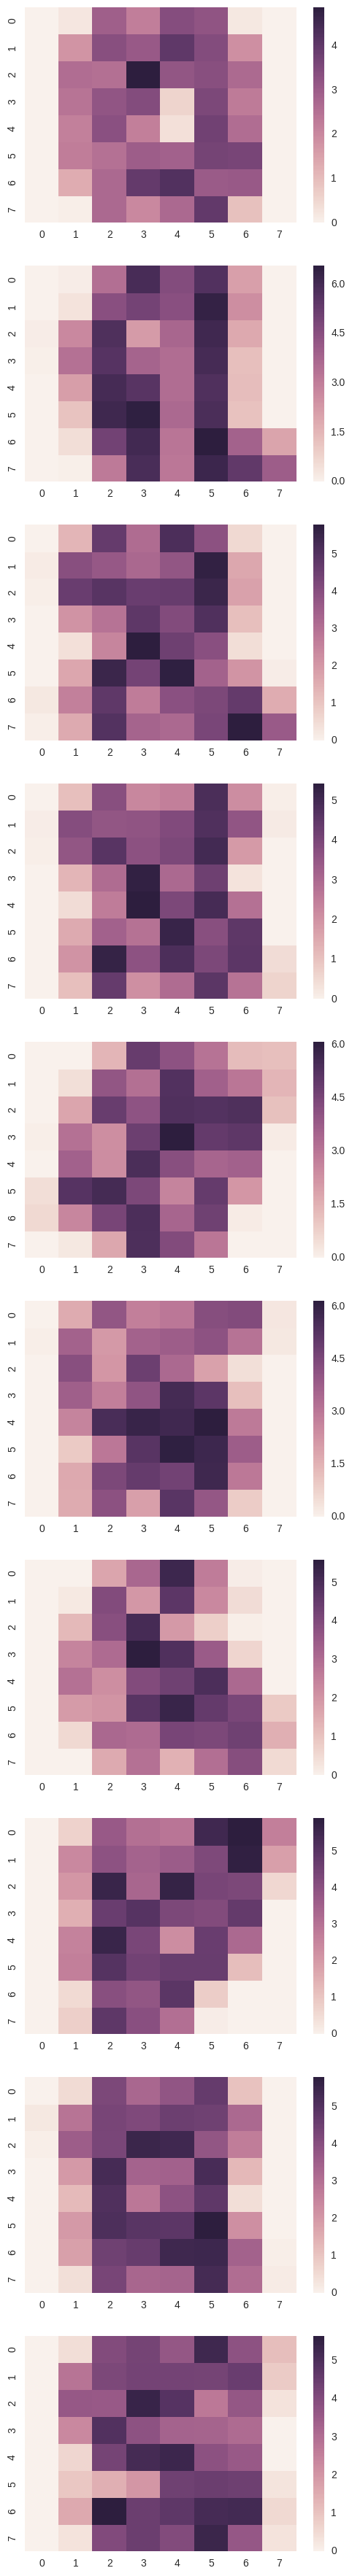

In [137]:
print("Variances among the different image classes:")
huge_figure2 = plt.figure(figsize=(6,45))
for i in range(0,10):
    df_i = df[df['classes'] == i].describe().loc['std'].values[0:-1]
    heatch_num = df_i.reshape(8,8)
    huge_figure2.add_subplot(10,1,i+1)
    sns.heatmap(heatch_num)

*Your answer goes here*

Not all dimensions will be helpful for modeling. Some of them have very low variances which means that they don't bring a lot of information. We may safely remove e.g. the left and the right edge. We may also remove relatively safely pixels that are close to the edges.


### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

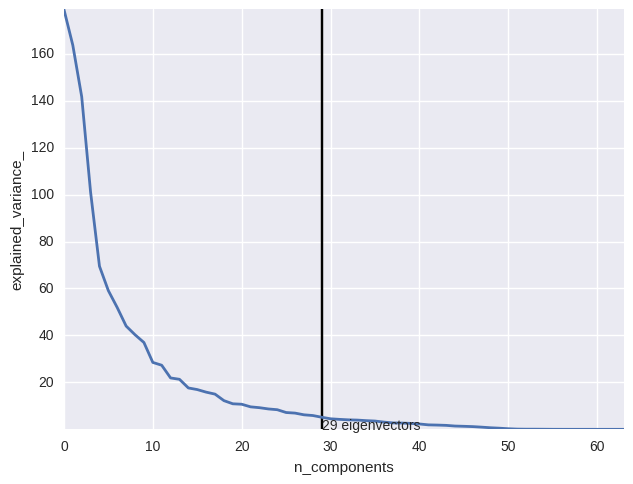

In [7]:
# Your code goes here
pca_digits = PCA(n_components=digits.data.shape[1])
pca_digits.fit(digits.data)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_digits.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.vlines(29,0,180) 
plt.annotate('29 eigenvectors',(29,0))


Number components needed for 95% or more: 29


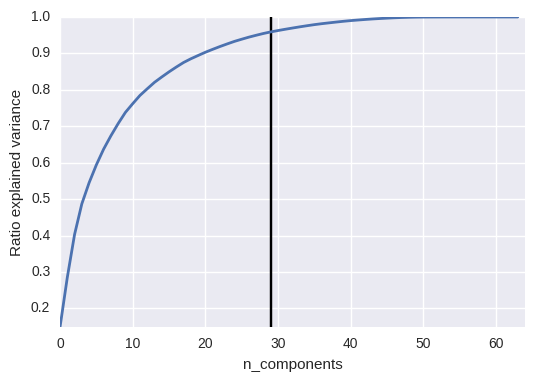

In [178]:
total_var = sum(pca_digits.explained_variance_)
var_ratio = []
partial_var = 0
first_true = False
for n_comp in range(0,64):
    partial_var += pca_digits.explained_variance_[n_comp]
    var_ratio.append(partial_var/total_var)
    if not first_true and partial_var/total_var >= 0.95:
        first_true = True
        print("Number components needed for 95% or more: " + str(n_comp + 1))
        
plt.annotate('29 eigenvectors',(29,0))
plt.plot(var_ratio, linewidth=2)
plt.axis('tight')

plt.xlabel('n_components')
plt.ylabel('Ratio explained variance')
plt.xlim(0,64)
plt.vlines(29,0,180)


*Your answer goes here*

It suggests that the data lies on a lower dimensional manifold and the performance will increase if we perform dimensionality reduction.

### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

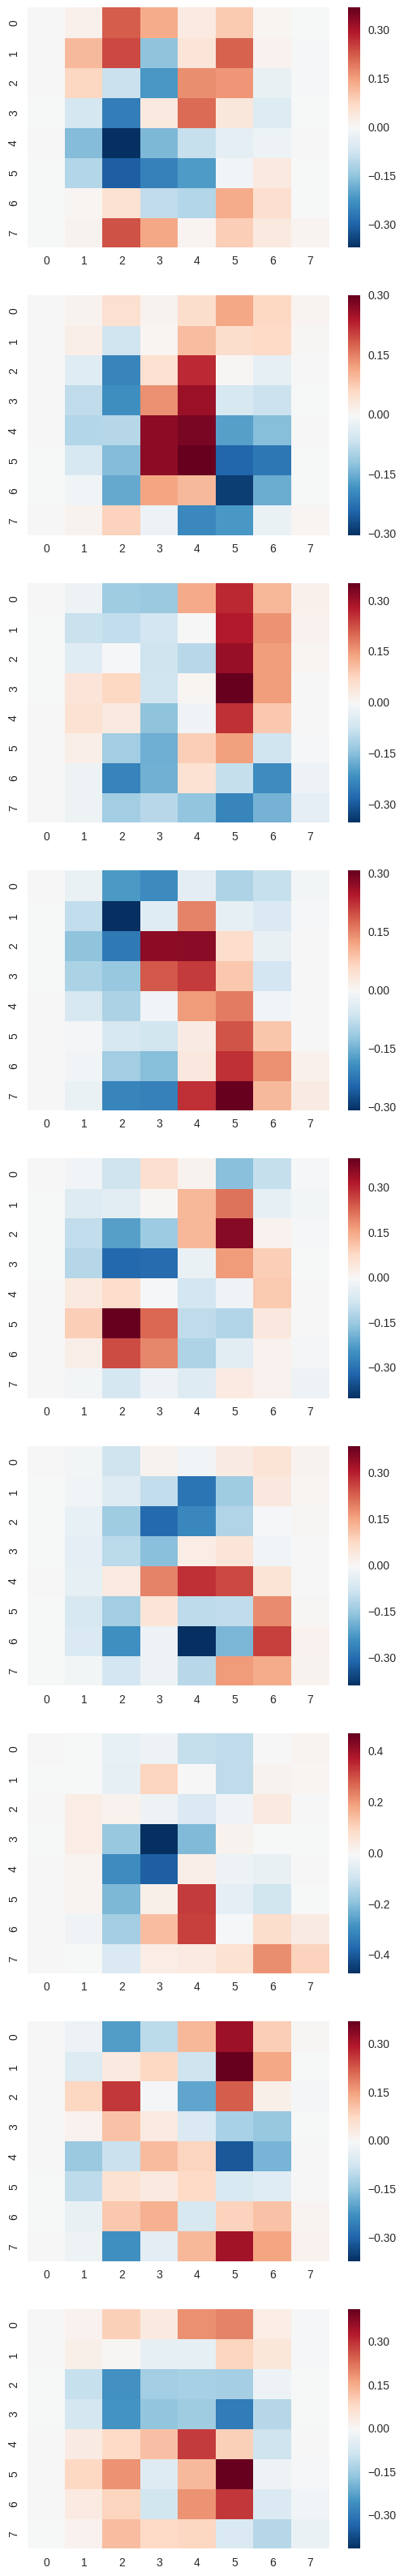

In [26]:
huge_figure56 = plt.figure(figsize=(6,45))

for idx,component in enumerate(pca_digits.components_[0:9]):
    huge_figure56.add_subplot(10,1,idx+1)
    img_component = component.reshape((8,8))
    sns.heatmap(img_component)

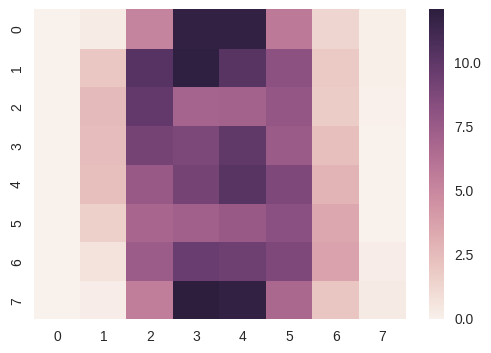

In [10]:
sns.heatmap(pca_digits.mean_.reshape(8,8))

### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

Percentage variances and component coeff printed and not in plot titles.


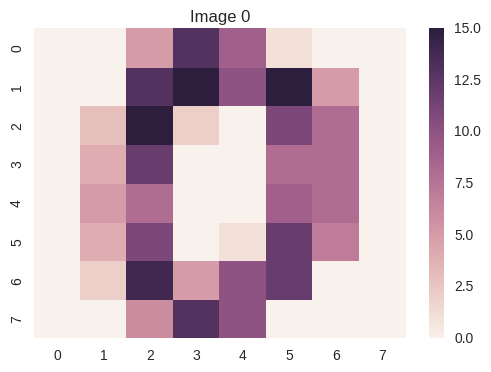

In [56]:
# Your code goes here
print("Percentage variances and component coeff printed and not in plot titles.")
sns.heatmap(digits.images[0])
plt.title("Image 0")

In [57]:
coefficients_digit_0 = pca_digits.transform(digits.data[0,:].reshape(1, -1)).flatten()
mean_digit = pca_digits.mean_

Component coefficients: 1
Explained variance ratio 1 comp: 0.148905935841


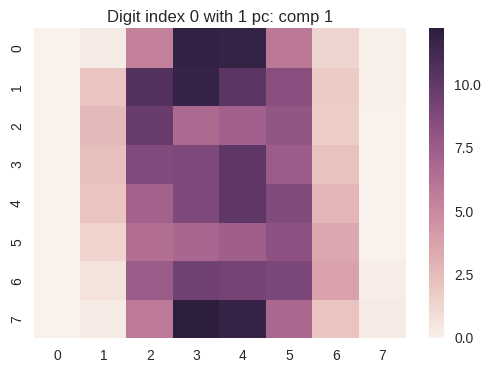

In [69]:
digit_0_1pc = mean_digit + coefficients_digit_0[0]*pca_digits.components_[0]
digit_0_1pc = digit_0_1pc.reshape(8,8)
sns.heatmap(digit_0_1pc)
print("Component coefficients: " + str(int(coefficients_digit_0[0])))
print("Explained variance ratio 1 comp: " + str(pca_digits.explained_variance_ratio_[0]))
plt.title("Digit index 0 with 1 pc: comp 1")

Component coefficients: 1, -21
Explained variance ratio 2 comp: 0.285093648237


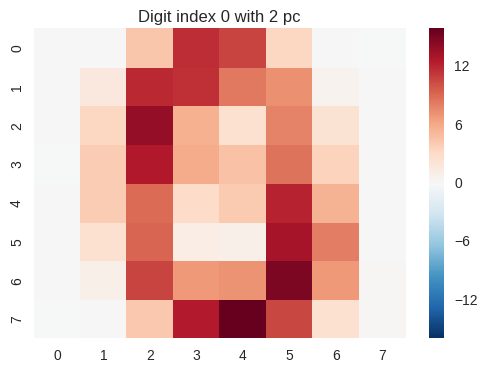

In [70]:
digit_0_2pc = mean_digit + coefficients_digit_0[0]*pca_digits.components_[0] + coefficients_digit_0[1]*pca_digits.components_[1]
digit_0_2pc = digit_0_2pc.reshape(8,8)
sns.heatmap(digit_0_2pc)
print("Component coefficients: " + str(int(coefficients_digit_0[0]))+ ", " +str(int(coefficients_digit_0[1])))
print("Explained variance ratio 2 comp: " + str(pca_digits.explained_variance_ratio_[0] + pca_digits.explained_variance_ratio_[1]))
plt.title("Digit index 0 with 2 pc")

Component coefficients: 1, -21, 9, -13, 7
Explained variance ratio 5 comp: 0.544963526727


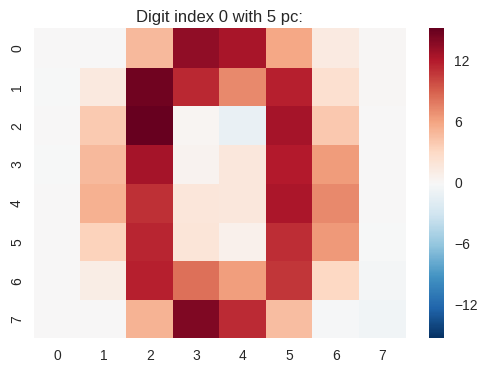

In [71]:
digit_0_5pc = mean_digit + coefficients_digit_0[0]*pca_digits.components_[0] + coefficients_digit_0[1]*pca_digits.components_[1]+coefficients_digit_0[2]*pca_digits.components_[2]+coefficients_digit_0[3]*pca_digits.components_[3]+coefficients_digit_0[4]*pca_digits.components_[4]
digit_0_5pc = digit_0_5pc.reshape(8,8)
sns.heatmap(digit_0_5pc)
print("Component coefficients: " + str(int(coefficients_digit_0[0]))+ ", " +str(int(coefficients_digit_0[1]))+ ", " +str(int(coefficients_digit_0[2]))+ ", " +str(int(coefficients_digit_0[3]))+ ", " +str(int(coefficients_digit_0[4])))
print("Explained variance ratio 5 comp: " + str(pca_digits.explained_variance_ratio_[0] + pca_digits.explained_variance_ratio_[1] + pca_digits.explained_variance_ratio_[2] + pca_digits.explained_variance_ratio_[3] + pca_digits.explained_variance_ratio_[4]))
plt.title("Digit index 0 with 5 pc:")

*Your answer goes here*

The eigenvectors produce realistic data. With 5 components the constructed digit closely resembles the first digit and looks even more like a 0 because of reduced noise. The method is effective.

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [144]:
new_data = []
for idx,data in enumerate(digits.data):
    coeffs = pca_digits.transform(digits.data[idx,:].reshape(1, -1)).flatten()
    img = pca_digits.mean_
    for idx2,coeff in enumerate(coeffs[0:29]):
        img = img + coeff*pca_digits.components_[idx2]
    
    new_data.append(img)
    

In [145]:
new_data = np.asarray(new_data)

In [146]:
# Your code goes here
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

svc_lin_normal = SVC(kernel = 'linear', random_state=1337)

svc_lin_trans = SVC(kernel = 'linear', random_state=1337)

gauss_normal = GaussianNB()
gauss_trans = GaussianNB()

In [147]:
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict, cross_val_score
kf = KFold(1797, n_folds = 5,shuffle=True, random_state=1337)

In [148]:
dict_performances = {}

for con in ['svc_lin_normal', 'svc_lin_trans','gaussian_normal','gaussian_trans']:
    dict_performances[con] = []


for foldnumber,(train,test) in enumerate(kf,start=1):

        
    svc_lin_normal.fit(digits.data[train,:],digits['target'][train])
    dict_performances['svc_lin_normal'].append(svc_lin_normal.score(digits.data[test,:],digits['target'][test]))
 

for foldnumber,(train,test) in enumerate(kf,start=1):
    
    #print(new_data[train,:])
    svc_lin_trans.fit(new_data[train,:] , digits['target'][train])
    dict_performances['svc_lin_trans'].append(svc_lin_trans.score(new_data[test,:],digits['target'][test]))
    

for foldnumber,(train,test) in enumerate(kf,start=1):
    
        
    gauss_normal.fit(digits.data[train,:],digits['target'][train])
    dict_performances['gaussian_normal'].append(gauss_normal.score(digits.data[test,:],digits['target'][test]))


for foldnumber,(train,test) in enumerate(kf,start=1):

        
    gauss_trans.fit(new_data[train,:],digits['target'][train])
    dict_performances['gaussian_trans'].append(gauss_trans.score(new_data[test,:],digits['target'][test]))

In [149]:
print(dict_performances)

{'gaussian_trans': [0.90833333333333333, 0.91666666666666663, 0.89972144846796653, 0.92200557103064062, 0.89693593314763231], 'svc_lin_trans': [0.98055555555555551, 0.98055555555555551, 0.98050139275766013, 0.97214484679665736, 0.95821727019498604], 'gaussian_normal': [0.875, 0.78888888888888886, 0.86908077994428967, 0.86908077994428967, 0.82451253481894149], 'svc_lin_normal': [0.98055555555555551, 0.98055555555555551, 0.96935933147632314, 0.97214484679665736, 0.96657381615598881]}


In [151]:
print("Means:")
for item in dict_performances:
    dict_performances[item] = np.mean(dict_performances[item])
print(dict_performances)

Means:
{'gaussian_trans': 0.90873259052924793, 'svc_lin_trans': 0.97439492417208284, 'gaussian_normal': 0.84531259671928205, 'svc_lin_normal': 0.97383782110801609}


*Your answer goes here*

The Gaussian classifier improved and the SVM only slightly when using 29 principle components.